# <center>Structural Analysis and Visualization of Networks</center>

## <center>Home Assignment #4: Community Detection Algorithms

### <center>Student: *Vyacheslav Shiryaev*</center>

## Problems

### Task 1* (For those who have not done that during the seminar)

On this seminar your are asked to implement simple community detection algorightm. It is called [Markov Cluster Algorithm](http://micans.org/mcl/) (MCL).

Implement Markor Clustering Algorithm

**Input:** Transition matrix $T = D^{-1}A$

**Output:** Adjacency matrix $M^*$

1. Set $M = T$
2. **repeat:**
    3. *Expansion Step:* $M = M^p$ (usually $p=2$)
    4. *Inflation Step:* Raise every entry of $M$ to the power $\alpha$ (usualy $\alpha=2$)
    5. *Renormalize:* Normalize each row by its sum
    6. *Prunning:* Replace entries that are close to $0$ by pure $0$
7. **until** $M$ converges
8. $M^* = M$
<br\>
<br\>

As a result you should get a cluster matrix s.t. elements of the cluster correspont to nonzero elements of the columns of the matrix. 
<br\>
* Run this method for network [1](https://www.hse.ru/data/2016/03/15/1127695811/network1.mat), [2](https://www.hse.ru/data/2016/03/15/1127699956/network2.mat) and [3](https://www.hse.ru/data/2016/03/15/1127703057/network3.mat).
* Play with the parameters ($p$, $\alpha$, zero tolerance), analyse the results

<hr />


### Solution

Firstly, let's import all packages that will be used:

In [30]:
# -*- coding: utf-8 -*-
from __future__ import division
import matplotlib.pyplot as plt
import matplotlib
plt.xkcd()
import numpy as np
import pandas as pd
import scipy as sp
import networkx as nx
import operator
%matplotlib inline
import scipy.io
from matplotlib.pylab import matshow, show, cm

Secondly, some useful functions for Markov Cluster Alogirthm are needed to create

In [ ]:
def normalize(A):
    column_sums = A.sum(axis=0)
    new_matrix = A / column_sums[np.newaxis, :]
    return new_matrix

def inflate(A, inflate_factor):
    return normalize(np.power(A, inflate_factor))

def expand(A, expand_factor):
    return np.linalg.matrix_power(A, expand_factor)

def add_diag(A, mult_factor):
    return A + mult_factor * np.identity(A.shape[0])

def get_clusters(A):
    clusters = []
    for i, r in enumerate((A>0).tolist()):
        if r[i]:
            clusters.append(A[i,:]>0)

    clust_map  ={}
    for cn , c in enumerate(clusters):
        for x in  [ i for i, x in enumerate(c) if x ]:
            clust_map[cn] = clust_map.get(cn, [])  + [x]
    return clust_map

def draw(G, A, cluster_map):
    import networkx as nx
    import matplotlib.pyplot as plt

    clust_map = {}
    for k, vals in cluster_map.items():
        for v in vals:
            clust_map[v] = k

    colors = []
    for i in range(len(G.nodes())):
        colors.append(clust_map.get(i, 100))

    pos = nx.spring_layout(G)

    from matplotlib.pylab import matshow, show, cm
    plt.figure(2)
    nx.draw_networkx_nodes(G, pos,node_size = 200, node_color =colors , cmap=plt.cm.Blues )
    nx.draw_networkx_edges(G,pos, alpha=0.5)
    matshow(A, fignum=1, cmap=cm.gray)
    plt.show()
    show()


def stop(M, i):

    if i%5==4:
        m = np.max( M**2 - M) - np.min( M**2 - M)
        if m==0:
            return True

    return False

Definition of function of MCA

In [32]:
def MCA(G, expand_factor, inflate_factor, max_loop, mult_factor):
    A = np.array(nx.adjacency_matrix(G).todense())
    M = add_diag(A, mult_factor)
    M = normalize(M)
    
    for i in range(max_loop):
        M = inflate(M, inflate_factor)
        M = expand(M, expand_factor)
        if stop(M, i): break
    
    clusters = get_clusters(M)
    return clusters

In [123]:
expand_factor = 2
inflate_factor = 2
max_loop = 5000
mult_factor = 1

In [124]:
data1 = scipy.io.loadmat('network1.mat')
G1 = nx.Graph(data1['A'])

data2 = scipy.io.loadmat('network2.mat')
G2 = nx.Graph(data2['A'])

data3 = scipy.io.loadmat('network3.mat')
G3 = nx.Graph(data3['A'])

clust1 = MCA(G1, expand_factor, inflate_factor, max_loop, mult_factor)
clust2 = MCA(G2, expand_factor, inflate_factor, max_loop, mult_factor)
clust3 = MCA(G3, expand_factor, inflate_factor, max_loop, mult_factor)

In [125]:
def plot_matrix_graph(G, clusters, A):
    clust_map = {}
    for k, vals in clusters.items():
        for v in vals:
            clust_map[v] = k

    colors = []
    for i in range(len(G.nodes())):
        colors.append(clust_map.get(i, 100))
    
    pos = nx.spring_layout(G)

    plt.figure(2)
    nx.draw_networkx_nodes(G, pos,node_size = 200, node_color =colors , cmap=plt.cm.Blues )
    nx.draw_networkx_edges(G,pos, alpha=0.5)
    matshow(A, fignum=1, cmap=cm.gray)
    plt.show()
    show()

Network 1 with parameters alpha = 2 and p =  2 number of clusters =  4


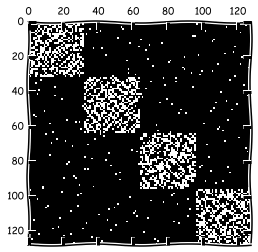

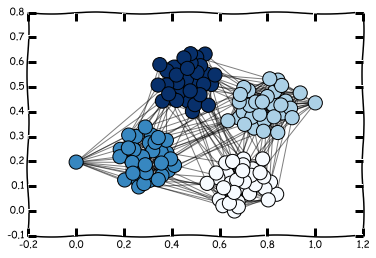

Network 2 with parameters alpha = 2 and p =  2 number of clusters =  6


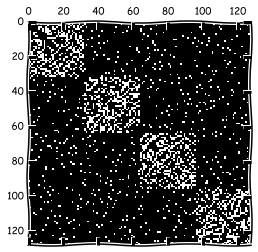

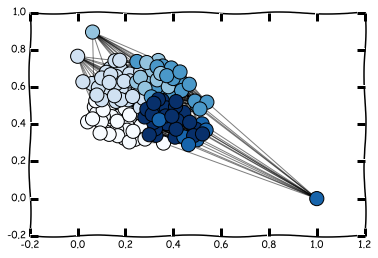

Network 3 with parameters alpha = 2 and p =  2 number of clusters =  128


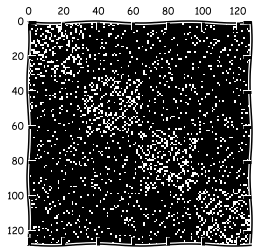

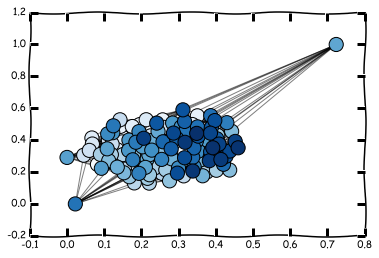

In [126]:
print 'Network 1 with parameters alpha =', inflate_factor, 'and p = ', expand_factor, 'number of clusters = ', len(clust1)
plot_matrix_graph(G1, clust1, data1['A'])

print 'Network 2 with parameters alpha =', inflate_factor, 'and p = ', expand_factor, 'number of clusters = ', len(clust2)
plot_matrix_graph(G2, clust2, data2['A'])

print 'Network 3 with parameters alpha =', inflate_factor, 'and p = ', expand_factor, 'number of clusters = ', len(clust3)
plot_matrix_graph(G3, clust3, data3['A'])

As it can be seen from pictures only first Network has good cluster decomposition. In the second Network, there are 6 clusters, which is quite good.

Let's play with parameters

Network 1 with parameters alpha = 5 and p =  2 number of clusters =  128


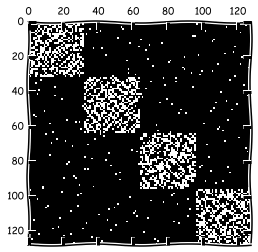

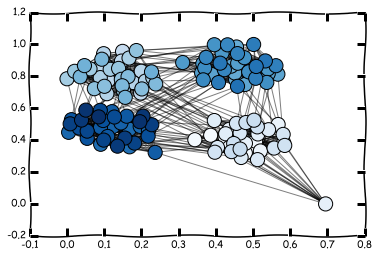

Network 2 with parameters alpha = 5 and p =  2 number of clusters =  128


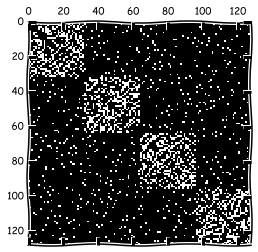

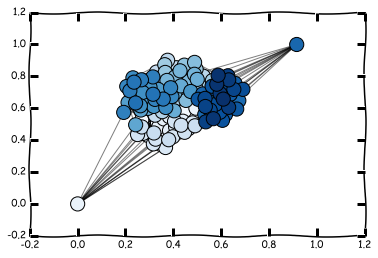

Network 3 with parameters alpha = 5 and p =  2 number of clusters =  128


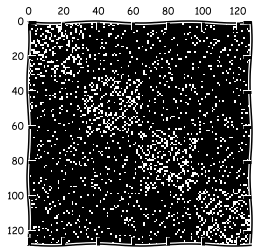

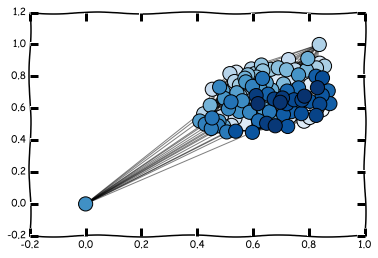

In [127]:
expand_factor = 2
inflate_factor = 5
max_loop = 5000
mult_factor = 1

data1 = scipy.io.loadmat('network1.mat')
G1 = nx.Graph(data1['A'])

data2 = scipy.io.loadmat('network2.mat')
G2 = nx.Graph(data2['A'])

data3 = scipy.io.loadmat('network3.mat')
G3 = nx.Graph(data3['A'])

clust1 = MCA(G1, expand_factor, inflate_factor, max_loop, mult_factor)
clust2 = MCA(G2, expand_factor, inflate_factor, max_loop, mult_factor)
clust3 = MCA(G3, expand_factor, inflate_factor, max_loop, mult_factor)

print 'Network 1 with parameters alpha =', inflate_factor, 'and p = ', expand_factor, 'number of clusters = ', len(clust1)
plot_matrix_graph(G1, clust1, data1['A'])

print 'Network 2 with parameters alpha =', inflate_factor, 'and p = ', expand_factor, 'number of clusters = ', len(clust2)
plot_matrix_graph(G2, clust2, data2['A'])

print 'Network 3 with parameters alpha =', inflate_factor, 'and p = ', expand_factor, 'number of clusters = ', len(clust3)
plot_matrix_graph(G3, clust3, data3['A'])

In each case, algorithm returned, that each node is a separate cluster.

Network 1 with parameters alpha = 5 and p =  5 number of clusters =  4


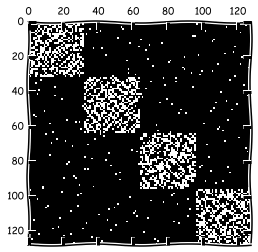

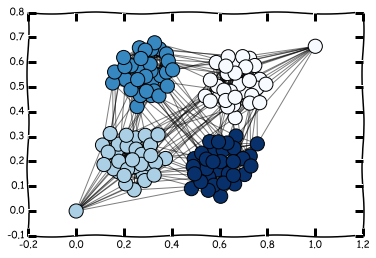

Network 2 with parameters alpha = 5 and p =  5 number of clusters =  1


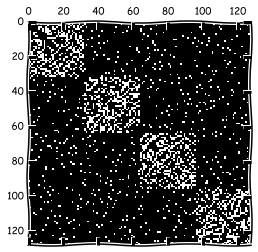

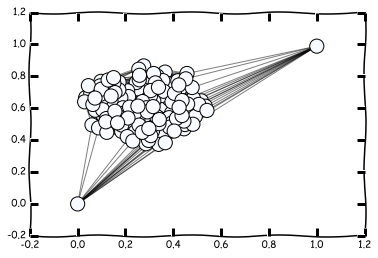

Network 3 with parameters alpha = 5 and p =  5 number of clusters =  1


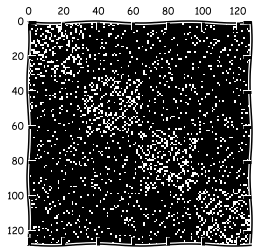

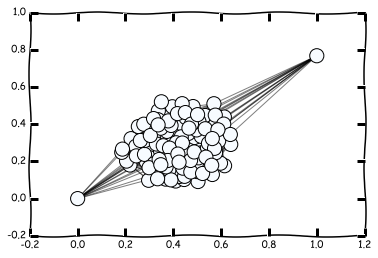

In [128]:
expand_factor = 5
inflate_factor = 5
max_loop = 5000
mult_factor = 1

data1 = scipy.io.loadmat('network1.mat')
G1 = nx.Graph(data1['A'])

data2 = scipy.io.loadmat('network2.mat')
G2 = nx.Graph(data2['A'])

data3 = scipy.io.loadmat('network3.mat')
G3 = nx.Graph(data3['A'])

clust1 = MCA(G1, expand_factor, inflate_factor, max_loop, mult_factor)
clust2 = MCA(G2, expand_factor, inflate_factor, max_loop, mult_factor)
clust3 = MCA(G3, expand_factor, inflate_factor, max_loop, mult_factor)

print 'Network 1 with parameters alpha =', inflate_factor, 'and p = ', expand_factor, 'number of clusters = ', len(clust1)
plot_matrix_graph(G1, clust1, data1['A'])

print 'Network 2 with parameters alpha =', inflate_factor, 'and p = ', expand_factor, 'number of clusters = ', len(clust2)
plot_matrix_graph(G2, clust2, data2['A'])

print 'Network 3 with parameters alpha =', inflate_factor, 'and p = ', expand_factor, 'number of clusters = ', len(clust3)
plot_matrix_graph(G3, clust3, data3['A'])

In this case, it's OK with first network. However, second and third have only one cluster.